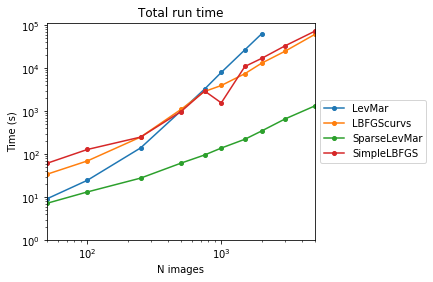

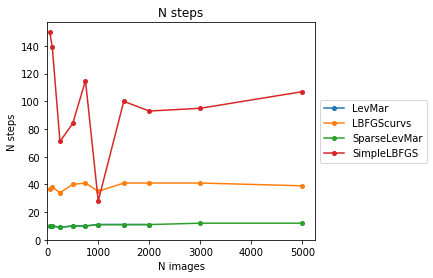

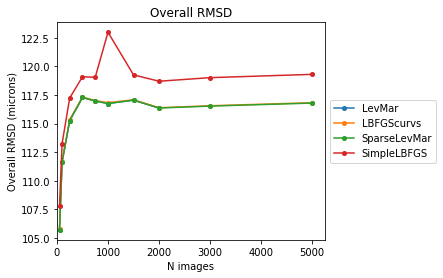

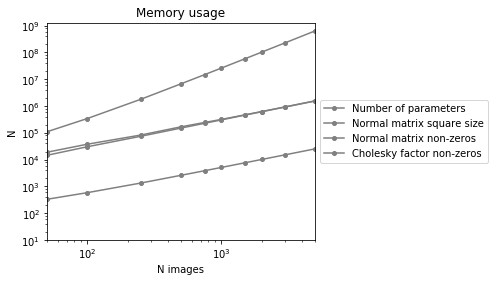

In [2]:
from matplotlib import pyplot as plt
import os

# original root = "/reg/d/psdm/cxi/cxi78513/res/brewster/paper_2017/plots"
root = "data/figure4"
filename = os.path.join(root, "performance.txt")
write_pdf = False

#          0                   1         2              3               4         5                      6                           7                         8
headers = "Refinement engine","Nimages","Overall RMSD","Total runtime","N steps","Number of parameters","Normal matrix square size","Normal matrix non-zeros","Cholesky factor non-zeros"
funcs = [None, int, float, float, int, int, int, int, int]
xaxis = headers[1]

data = {}
for line in open(filename):
  if headers[0] in line: continue
  items = line.split()
  engine = items[0]
  if engine not in data:
    data[engine] = {}
  for key, value, func in zip(headers[:len(items)],items,funcs[:len(items)]):
    if func is None: continue
    if key not in data[engine]:
      data[engine][key] = []
    data[engine][key].append(func(value))

plots = [3],[4],[2],[5,6,7,8]
plots = [[headers[i] for i in p] for p in plots]
plot_options = \
  { # Runtime
    'yscale': (1,None),
    'logs': True,
    'title': "Total run time",
    'ylabel': "Time (s)",
    'legend' : data.keys(),
    'color': None,
  },{ # N steps
    'yscale': (0,None),
    'logs': False,
    'title': "N steps",
    'ylabel': "N steps",
    'legend' : data.keys(),
    'color': None,
  },{ # RMSD
    'yscale': (None,None),
    'logs': False,
    'title': "Overall RMSD",
    'ylabel': "Overall RMSD (microns)",
    'legend' : data.keys(),
    'color': None,
  },{ # Memory
    'yscale': (10,None),
    'logs': True,
    'title': "Memory usage",
    'ylabel': "N",
    'legend': plots[3],
    'color': 'gray',
  }

for plot, options in zip(plots, plot_options):
  fig = plt.figure()# For paper, add this: figsize=(4.42/2.54, 3.32/2.54))
  ax = plt.gca()
  for engine in data:
    for yaxis in plot:
      if yaxis not in data[engine]: continue
      plt.plot(data[engine][xaxis], data[engine][yaxis],'o-', markersize=4, color=options['color'])
  if options['logs']:
    ax.set_xscale("log", nonposx='clip')
    ax.set_yscale("log", nonposy='clip')
    plt.xlim(50,5000)
  else:
    plt.xlim(0,None)
  plt.ylim(options['yscale'])

  if write_pdf:
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
  else:
    plt.title(options['title'])
    plt.xlabel("N images")
    plt.ylabel(options['ylabel'])
    
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    plt.legend(options['legend'], loc='center left', bbox_to_anchor=(1, 0.5))

if write_pdf:
  pp = PdfPages('performance.pdf')
  for i in plt.get_fignums():
    pp.savefig(plt.figure(i))
  pp.close()
else:
  plt.show()